# Carga de datos "HVAC"

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
mainpath = "../Datasets/"
filename = "HVAC.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HISTORICO_DATOS")
data

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,...,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3,ORDEN
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,0.000000,26.984179,34.337925,4.266667,...,0.0,0.0,7.954935,22.497906,0,0,100.0,100.0,100.000000,35433
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,0.866667,26.805664,34.337925,0.000000,...,0.0,0.0,0.588573,22.497906,0,0,-25.0,-25.0,-25.000000,35441
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,1.000000,26.055836,34.337925,0.000000,...,0.0,0.0,0.000000,22.288696,0,0,-25.0,-25.0,-25.000000,35442
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,1.000000,25.266325,34.337925,0.000000,...,0.0,0.0,0.000000,22.273752,0,0,-25.0,-25.0,-25.000000,35443
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,1.000000,25.605207,34.330490,0.000000,...,0.0,0.0,0.000000,22.408245,0,0,-25.0,-25.0,-25.000000,35444
5,2016-01-01 01:15:00,0.888717,38.688263,190.300995,279.843140,553.907654,1.000000,26.717415,34.330490,0.000000,...,0.0,0.0,0.000000,22.617455,0,0,-25.0,-25.0,-25.000000,35445
6,2016-01-01 01:30:00,0.802738,38.688263,176.961700,292.683258,533.081726,1.000000,28.336132,34.300755,0.000000,...,0.0,0.0,0.000000,22.766891,0,0,-25.0,-25.0,-25.000000,35446
7,2016-01-01 01:45:00,0.831385,38.688263,176.713120,269.536377,522.341614,1.000000,29.540056,34.256153,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35447
8,2016-01-01 02:00:00,0.802729,38.688263,176.003754,241.409500,512.430237,1.000000,30.624674,34.236099,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35448
9,2016-01-01 02:15:00,0.898297,38.688263,177.443466,202.532761,470.506317,1.000000,31.644857,34.207573,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35449


## Variables eliminadas por no ser necesarias

In [4]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS", "C_O_P_ INSTALACIÓN GRUPO FRÍO 1",
                       "C_O_P_ INSTALACÍON GRUPO FRÍO 2", "ORDEN"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]
data2.shape

(79285, 45)

### Cantidad de valores nulos por variable

In [5]:
data3 = data2[data2 != 0]
pd.isnull(data3).sum()

Fecha- hora de lectura                            0
POTENCIA TRAFO 2                                563
POTENCIA TRAFO 3                                493
POTENCIA TRAFO 4                               1042
POTENCIA TRAFO 5                                517
POTENCIA MEDIA CONECTADA                        182
PERIODO P6                                    49097
CONTROL FRÍO                                  30610
CONTROL CALOR                                 40110
CAPACIDAD BOMBA CALOR FELIPE %                47030
CAPACIDAD BOMBA CALOR CARLOS %                44653
POTENCIA BOMBA CALOR FELIPE                     855
POTENCIA BOMBA CALOR CARLOS                     855
TEMPERATURA AMBIENTE BOMBA CALOR CARLOS         855
TEMPERATURA AMBIENTE BOMBA CALOR FELIPE         855
TEMPERATURA EXTERIOR                          15362
CAPACIDAD GRUPO DE FRÍO 1                     45020
CAPACIDAD GRUPO DE FRÍO 2                     39079
POTENCIA GRUPO FRÍO 1                           995
POTENCIA GRU

## Resumen estadístico básico de las variables numéricas
- count: numero de elementos no nulos
- mean: promedio (suma de valores / numero de elementos)
- std: desviacion estandar (que tanto se separan los valores del promedio)
- min: valor minimo
- 25%: primer cuartil
- 50%: segundo cuartil
- 75%: tercer cuartil
- max: valor maximo

In [6]:
cuartiles = data3.describe()
cuartiles.to_excel("../Datasets/describeHVAC.xlsx")
cuartiles

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,CAPACIDAD BOMBA CALOR CARLOS %,...,TEMPERATURA CONTROL DE BY PASS SECUNDARIO,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
count,78722.000000,78792.000000,78243.000000,78768.000000,79103.000000,30188.000000,48675.000000,39175.000000,32255.000000,34632.000000,...,1057.000000,324.000000,197.000000,200.000000,39173.000000,8972.0,11021.0,39175.000000,39170.000000,39173.000000
mean,21.415659,29.335971,322.380034,351.037831,768.994873,0.993748,14.568556,78.171784,56.635839,53.629318,...,8.120433,-2.311070,2.161495,2.212891,34.084023,1.0,1.0,32.973802,20.293568,25.625551
std,29.274846,20.254332,104.167281,172.051692,306.371541,0.062733,3.555707,471.253156,29.002209,25.884188,...,1.594850,5.916611,12.645559,4.646173,7.676897,0.0,0.0,52.166392,55.941712,54.722419
min,0.140000,0.020000,1.417423,32.099998,7.882583,0.066667,2.754000,2.553333,1.066667,1.066667,...,6.308376,-7.608634,-8.931959,-3.191462,2.666667,1.0,1.0,-25.000000,-25.000000,-25.000000
25%,2.913333,20.700199,238.259995,166.501202,461.924469,1.000000,13.024667,38.299999,33.000000,33.000000,...,6.929914,-6.837938,-7.409115,-1.357194,24.700001,1.0,1.0,-25.000000,-25.000000,-25.000000
50%,9.053698,26.100000,349.380280,405.859650,866.903198,1.000000,13.704000,38.299999,55.200001,50.000000,...,7.350598,-5.426061,0.386911,1.105753,38.000000,1.0,1.0,20.006666,-25.000000,10.000000
75%,24.246666,34.646667,408.753723,476.139557,1016.493713,1.000000,15.231667,38.986668,83.000000,69.683331,...,9.246496,1.347223,3.032965,4.292879,40.200001,1.0,1.0,100.000000,100.000000,100.000000
max,227.385345,246.656601,565.151428,854.659973,1569.602173,1.000000,102.169998,8054.746582,100.000000,100.000000,...,12.241026,30.159239,52.415089,28.097906,57.500000,1.0,1.0,100.000000,100.000000,100.000000


# Transformación de variables y normalización  

### Valores atipicos 

        IQR = Q3 - Q1
        q < Q1 - 1.5 * IQR
        q > Q3 + 1.5 * IQR

In [7]:
dataLimpioArr = data3.to_numpy()
cuartilesArr = cuartiles.to_numpy()
for i in range(1, 44):
    for j in range(79285):
        q1 = cuartilesArr[4][i]
        q3 = cuartilesArr[6][i]
        iqr = q3 - q1
        extremoIzq = q1 - (1.5 * iqr)
        extremoDer = q3 + (1.5 * iqr)
        if (dataLimpioArr[j][i] < extremoIzq):
            dataLimpioArr[j][i] = cuartilesArr[1][i]
        if (dataLimpioArr[j][i] > extremoDer):
            dataLimpioArr[j][i] = cuartilesArr[1][i]
            
namesCol = data3.columns.values
dataSinAtipicos = pd.DataFrame.from_records(dataLimpioArr, columns = namesCol)
dataSinAtipicos.describe()

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,CAPACIDAD BOMBA CALOR CARLOS %,...,TEMPERATURA CONTROL DE BY PASS SECUNDARIO,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
count,78722.000000,78792.000000,78243.000000,78768.000000,7.910300e+04,3.018800e+04,48675.000000,39175.000000,32255.000000,34632.000000,...,1057.000000,324.000000,197.000000,200.000000,39173.0,8972.0,11021.0,39175.000000,39170.000000,39173.000000
mean,13.731301,29.335971,322.380034,351.037831,9.937481e-01,1.456856e+01,78.085623,38.800987,56.635839,53.629318,...,8.120433,-2.503858,-2.325080,20.191461,1.0,1.0,1.0,32.973802,20.293568,25.625551
std,12.960622,20.254332,104.167281,172.051692,1.433307e-12,5.592064e-12,1.844845,2.777460,29.002209,25.884188,...,1.594850,5.382558,4.713070,14.519206,0.0,0.0,0.0,52.166392,55.941712,54.722419
min,0.140000,0.020000,1.417423,32.099998,9.937481e-01,1.456856e+01,37.304531,2.553333,1.066667,1.066667,...,6.308376,-7.608634,-8.931959,1.452331,1.0,1.0,1.0,-25.000000,-25.000000,-25.000000
25%,2.913333,20.700199,238.259995,166.501202,9.937481e-01,1.456856e+01,78.171784,38.299999,33.000000,33.000000,...,6.929914,-6.837938,-7.409115,4.987148,1.0,1.0,1.0,-25.000000,-25.000000,-25.000000
50%,9.053698,26.100000,349.380280,405.859650,9.937481e-01,1.456856e+01,78.171784,38.299999,55.200001,50.000000,...,7.350598,-5.426061,0.386911,34.084023,1.0,1.0,1.0,20.006666,-25.000000,10.000000
75%,24.246666,34.646667,408.753723,476.139557,9.937481e-01,1.456856e+01,78.171784,38.986668,83.000000,69.683331,...,9.246496,1.347223,2.212891,34.084023,1.0,1.0,1.0,100.000000,100.000000,100.000000
max,55.562756,246.656601,565.151428,854.659973,9.937481e-01,1.456856e+01,78.171784,105.239998,100.000000,100.000000,...,12.241026,17.892229,4.466334,34.084023,1.0,1.0,1.0,100.000000,100.000000,100.000000


## Analisis de correlacion

In [8]:
correlacion = dataSinAtipicos.corr(method = "pearson")
correlacion.to_excel("../Datasets/corrHVAC.xlsx")
correlacion

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,CAPACIDAD BOMBA CALOR CARLOS %,...,TEMPERATURA CONTROL DE BY PASS SECUNDARIO,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
POTENCIA TRAFO 2,1.000000e+00,1.280230e-01,5.109406e-01,5.002459e-01,-1.319034e-13,-1.175583e-13,9.376644e-03,-7.267041e-02,1.529170e-01,1.473342e-01,...,-4.418081e-01,-6.344534e-01,-4.310197e-01,-9.322175e-02,NaN,NaN,NaN,1.065246e-01,3.064376e-02,6.826979e-02
POTENCIA TRAFO 3,1.280230e-01,1.000000e+00,4.017223e-01,3.292819e-01,6.305832e-14,-3.398294e-14,-1.495336e-02,2.252205e-01,-8.396961e-03,2.201246e-02,...,1.721840e-01,2.525877e-01,2.829941e-01,1.370557e-01,NaN,NaN,NaN,-1.013525e-01,-1.380753e-01,-1.567693e-01
POTENCIA TRAFO 4,5.109406e-01,4.017223e-01,1.000000e+00,8.055179e-01,-2.131853e-15,4.246463e-14,-7.891138e-03,5.900645e-02,1.787977e-01,1.471896e-01,...,-5.679273e-01,-5.849639e-01,-6.696084e-02,-1.229346e-01,NaN,NaN,NaN,1.508813e-01,1.636474e-02,7.053913e-02
POTENCIA TRAFO 5,5.002459e-01,3.292819e-01,8.055179e-01,1.000000e+00,-1.153920e-14,-4.879513e-15,-1.598764e-03,7.651279e-02,5.652321e-01,4.487644e-01,...,-6.103376e-01,-4.772193e-01,-2.335967e-01,-1.136685e-01,NaN,NaN,NaN,2.974574e-01,1.587037e-01,2.164295e-01
POTENCIA MEDIA CONECTADA,-1.319034e-13,6.305832e-14,-2.131853e-15,-1.153920e-14,1.000000e+00,-1.000000e+00,-2.768848e-11,8.131023e-14,-2.453071e-14,-3.286142e-14,...,2.726465e-16,1.703222e-17,-4.789126e-16,2.422352e-15,NaN,NaN,NaN,9.167177e-14,1.230057e-13,2.749601e-14
PERIODO P6,-1.175583e-13,-3.398294e-14,4.246463e-14,-4.879513e-15,-1.000000e+00,1.000000e+00,-3.248724e-12,9.547583e-15,1.916075e-14,-7.664511e-15,...,3.682540e-16,-3.991055e-16,-6.523922e-16,7.268796e-16,NaN,NaN,NaN,-3.237947e-14,-3.240742e-15,7.297268e-14
CONTROL FRÍO,9.376644e-03,-1.495336e-02,-7.891138e-03,-1.598764e-03,-2.768848e-11,-3.248724e-12,1.000000e+00,2.264380e-01,3.542466e-02,4.191956e-02,...,-6.803468e-02,-1.458739e-01,-2.633049e-01,1.831259e-01,NaN,NaN,NaN,-3.707286e-02,-7.962173e-02,-1.077765e-01
CONTROL CALOR,-7.267041e-02,2.252205e-01,5.900645e-02,7.651279e-02,8.131023e-14,9.547583e-15,2.264380e-01,1.000000e+00,-1.447683e-01,-1.065417e-01,...,2.435001e-01,-4.214606e-01,-5.914623e-01,2.350332e-01,NaN,NaN,NaN,-1.172757e-01,-5.064959e-02,-1.500988e-01
CAPACIDAD BOMBA CALOR FELIPE %,1.529170e-01,-8.396961e-03,1.787977e-01,5.652321e-01,-2.453071e-14,1.916075e-14,3.542466e-02,-1.447683e-01,1.000000e+00,7.273177e-01,...,-6.496135e-02,-2.313256e-02,4.463257e-02,-1.618566e-01,NaN,NaN,NaN,2.692092e-01,9.211747e-02,1.992659e-01
CAPACIDAD BOMBA CALOR CARLOS %,1.473342e-01,2.201246e-02,1.471896e-01,4.487644e-01,-3.286142e-14,-7.664511e-15,4.191956e-02,-1.065417e-01,7.273177e-01,1.000000e+00,...,-2.715706e-01,-7.373825e-02,4.068582e-02,-1.411157e-01,NaN,NaN,NaN,2.611301e-01,1.646362e-01,2.213760e-01


##### --------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
zscore = lambda x : (x - x.mean()) / x.std()
z_group = dataSinAtipicos["POTENCIA TRAFO 3"].transform(zscore)
z_group.describe()

count    7.879200e+04
mean     6.042060e-15
std      1.000000e+00
min     -1.447393e+00
25%     -4.263667e-01
50%     -1.597668e-01
75%      2.622005e-01
max      1.072959e+01
Name: POTENCIA TRAFO 3, dtype: float64

C:\Users\dag17\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dag17\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.0914e+04, 3.9084e+04, 6.3830e+03, 1.5450e+03, 2.8600e+02,
        1.9200e+02, 2.9800e+02, 6.7000e+01, 7.0000e+00, 1.6000e+01]),
 array([-1.44739264, -0.22969461,  0.98800341,  2.20570144,  3.42339947,
         4.6410975 ,  5.85879553,  7.07649356,  8.29419158,  9.51188961,
        10.72958764]),
 <a list of 10 Patch objects>)

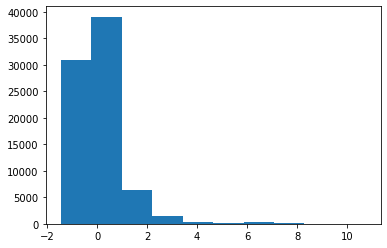

In [10]:
plt.hist(z_group)